In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import warnings
warnings.filterwarnings('ignore')
print('setup complete')


setup complete


In [2]:
df = pd.read_csv('Instagram data.csv',encoding='latin1')

In [3]:
df.head()

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learning model an...   
3  Heres how you can write a Python program to d...   
4  Plotting annotations while visualizing your da...   

                                            Hashtags  
0  #finance #money #business #investing #investme...  
1  #healthcare #health #covid #data #datascience ...  
2  #data #datascience #dataanalysis #dataanalytic...  
3  #python #pythonprogramming #pythonprojects #py...  
4  #datavisualization #datascience #data #dataana...

In [7]:
# to check null value
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [8]:
df.describe()

Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.088402   
min      22.000000    0.000000    0.000000   72.000000        4.000000   
25%      65.000000    4.000000    3.000000  121.500000       15.000000   
50%     109.000000    6.000000    6.000000  151.000000       23.000000   
75%     169.000000    8.000000   13.500000  204.000000       42.000000   
max    1095.000000   19.000000   75.000000  549.000000      611.000000   

          Follows  
count  119.000000  
mean    20.756303  
std     40.921580  
min      0.000000  
25%      4.000000  
50%      8.000000  
75%     18.000000  
max    260.000000

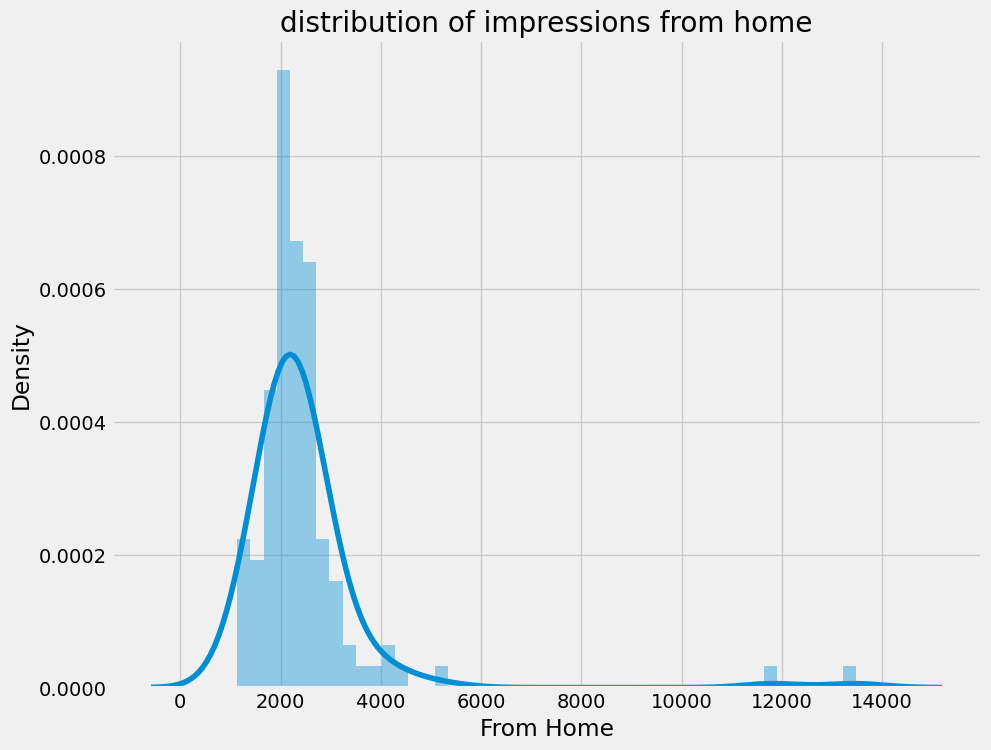

In [13]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('distribution of impressions from home')
sns.distplot(df['From Home'])
plt.show()

<AxesSubplot: title={'center': 'distribution of impressions from Hashtags'}, xlabel='From Hashtags', ylabel='Density'>

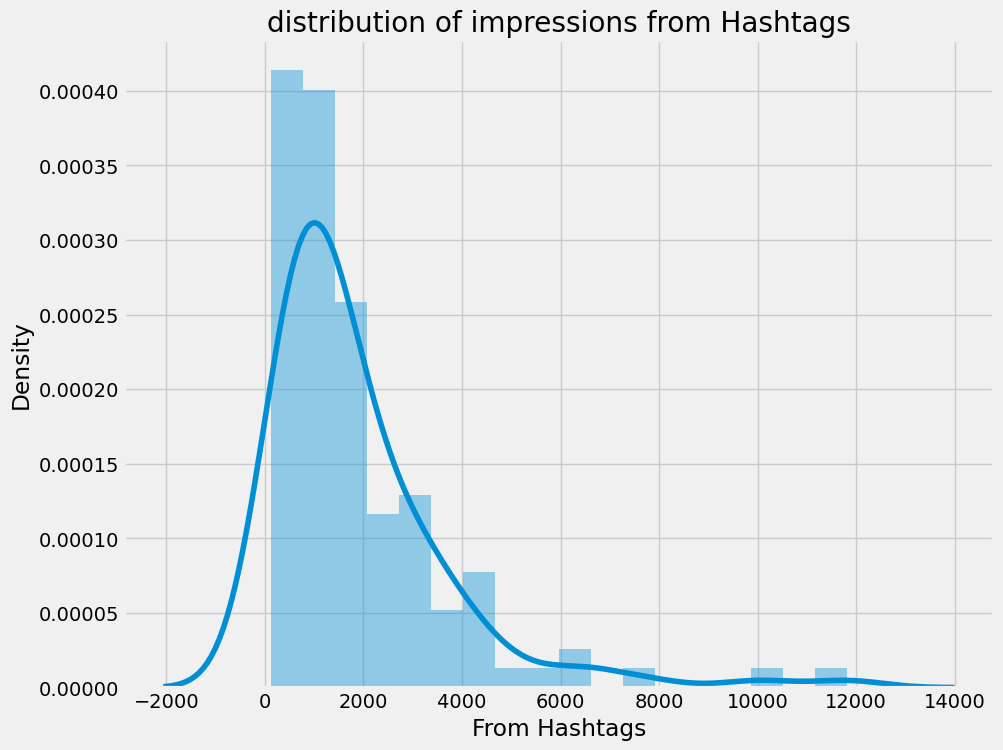

In [14]:
plt.figure(figsize=(10,8))
plt.title('distribution of impressions from Hashtags')
sns.distplot(df['From Hashtags'])

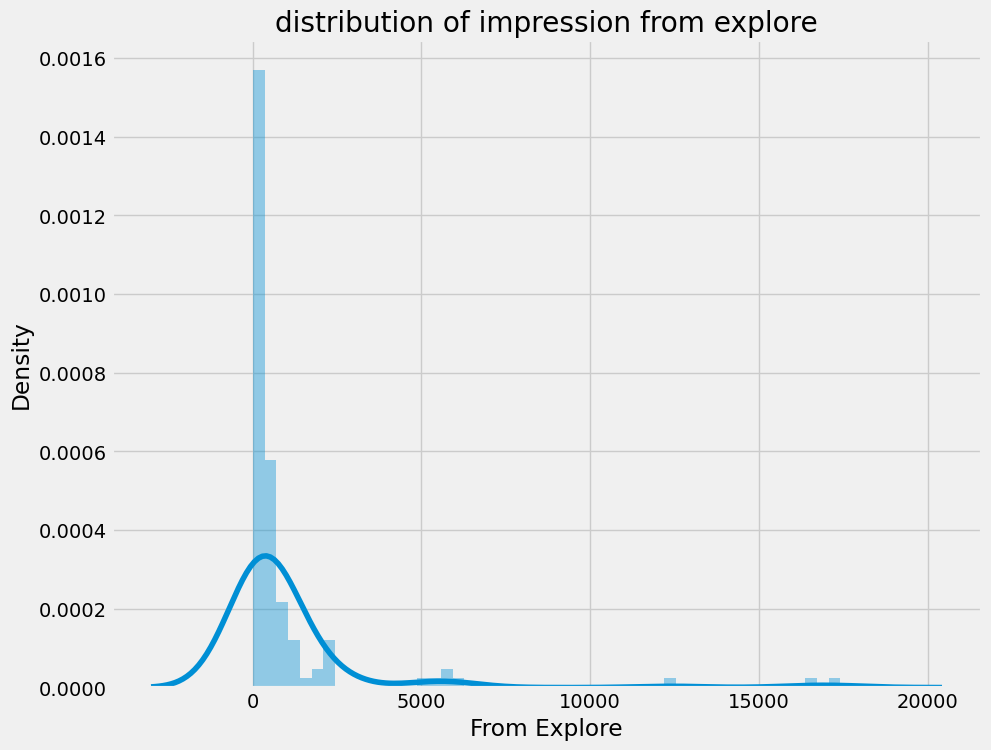

In [15]:
plt.figure(figsize=(10,8))
plt.title('distribution of impression from explore')
sns.distplot(df['From Explore'])
plt.show()

In [16]:
home = df['From Home'].sum()
hashtags = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home,hashtags,explore,other]
fig = px.pie(df,values=values,names=labels,title='impression on instagram Posts from diffrent source')
fig.show()

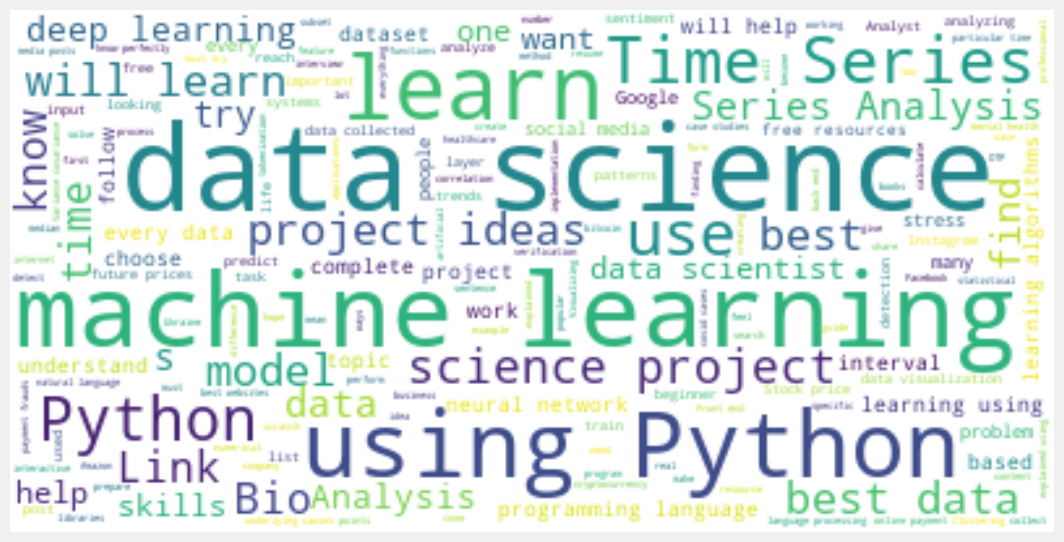

In [17]:
text = ' '.join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

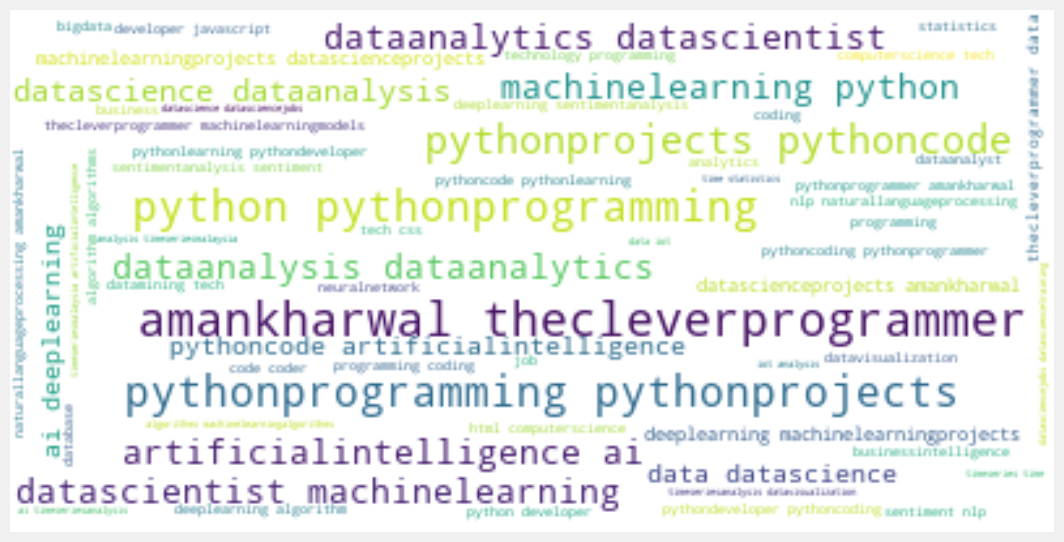

In [18]:
text = ' '.join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
figure = px.scatter(data_frame=df,x='Impressions',
                   y='Likes',size='Likes',trendline='ols',
                   title='relationship between likes and impressions')
figure.show()

In [20]:
figure = px.scatter(data_frame=df,x='Impressions',
                   y='Comments',size='Comments',trendline='ols',
                   title='relationship between likes and impressions')
figure.show()

In [21]:
figure = px.scatter(data_frame=df,x='Impressions',
                   y='Shares',size='Shares',trendline='ols',
                   title='relationship between likes and impressions')
figure.show()

In [22]:
figure = px.scatter(data_frame=df,x='Impressions',
                   y='Saves',size='Saves',trendline='ols',
                   title='relationship between likes and impressions')
figure.show()

In [23]:
corr = df.corr()
corr['Impressions'].sort_values(ascending=False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [24]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [25]:
figure = px.scatter(data_frame = df, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [28]:
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [29]:
model = PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8651225010876569

In [30]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12076.61642608])